# 20220624

#### CHAPTER 2 : 퍼셉트론


- 퍼셉트론이란?
  - 다수의 신호를 입력으로 받아 하나의 신호를 출력
  - 퍼셉트론 신호는 흐른다/안 흐른다의 두 가지 값을 가질 수 있다.
  - 입력 신호가 뉴런에 보내질 때는 각각 `고유한` 가중치가 곱해진다.
  - 뉴런에서 보내온 신호의 `총합`이 정해진 한계를 넘어설 때만 1을 출력한다.
    - 이를 `'뉴런이 활성화한다'`라고 표현한다. 이때 그 한계를 임계값이라 하며 대개 $\theta$로 표현한다.
  - 퍼셉트론은 `복수의 입력 신호 각각`에 `고유한 가중치를 부여`한다.
  - `가중치`는 각 신호가 `결과에 주는 영향력을 조절`하는 요소로 적용
    - 즉 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻함.
    - 퍼셉트론의 가중치는 그 값이 클수록 강한 신호를 흘려보낸다.

- 단순한 논리 회로
  - AND 게이트
    - 입력이 둘이고 출력은 하나이다.(참고 : 입력 신호와 출력 신호의 대응 표를 `진리표`라 한다)
    - 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력한다.
  - NAND 게이트와 OR 게이트
    - NAND 게이트 : AND 게이트의 출력을 뒤집은 것
    - 두 입력이 모두 1일 때만 0을 출력하고 그 외에는 1을 출력한다.
    - 이때 매개변수의 조합은 AND 게이트를 구현하는 매개변수의 부호를 모두 반전하기만 하면 NAND 게이트가 된다.
    - OR 게이트 : 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로이다.

---

#### 퍼셉트론의 구조는 AND, NAND, OR 게이트 모두에서 똑같다. 
#### 세 가지 게이트에서 다른 것은 매개변수(가중치와 임계값)의 값 뿐이다.
#### 즉, 똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정하여 AND, NAND, OR로 사용할 수 있게 된다.

> 퍼셉트론의 매개변수 값을 정하는 것은 컴퓨터가 아니라 인간이다. 인간이 직접 진리표라는 학습 데이터를 보면서 매개변수의 값을 생각한다. 기계학습 문제는 이 매개변수의 값을 정하는 작업을 컴퓨터가 자동으로 하도록 한다. 학습이란 적절한 매개변수 값을 정하는 작업이며, 사람은 퍼셉트론의 구조를 고민하고 컴퓨터에 학습할 데이터를 주는 일을 한다. 

---

- 퍼셉트론 구현해보자

In [1]:
def AND(x1, x2):
    # 매개변수(가중치와 임계값)는 함수 안에서 초기화한다.
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    
    # 이때, 부등식에 등호가 어디에 들어가 있는지 중요!!!
    
    if tmp <= theta:
        return 0
    elif tmp> theta:
        return 1

In [2]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


- 위 AND 게이트를 좀 더 효율적인 방식으로 수정해보자
- 함수 AND에서 tmp <= theta에서 theta를 좌항으로 옮겨서 정리한다.
- 즉, b + x1*w1 + x2*w2 <= 0 이 되고
- 이때, b를 편향이라고 바꿔부른다. 
  - 원래 b는 임계값! (=theta)

> 즉, 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여 그 값이 0을 초과하면 1을 출력하고, 그렇지 않으면 0을 출력한다. 

-  넘파이를 이용하여 가중치와 편향 개념 구현해보자

In [3]:
import numpy as np
x = np.array([0,1]) # 두 입력 값
w = np.array([0.5,0.5]) # 가중치
b = -0.7 # 편향
# 원래 우항에 있던 임계값을 좌항으로 옮겼기 때문에 마이너스! 그런데 이건 게이트마다 임계값이 다르기 때문에 좌항으로 옮겼을 때
# 음수일 수도 있고 양수일 수도 있음
np.sum(w*x)

C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


0.5

In [4]:
np.sum(w*x) + b

-0.19999999999999996

- 가중치와 편향을 도입한 AND 게이트를 구현해보자

In [5]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0 :
        return 0 
    else :
        return 1

> 가중치는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수고, 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력) 하느냐를 조정하는 매개변수이다. (책에 따라 셋 모두(가중치와 편향)를 가중치라고 할 때도 있다)

- NAND 게이트와 OR 게이트 구현

In [6]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0 :
        return 0
    else : 
        return 1

def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0 :
        return 0
    else : 
        return 1

- AND, NAND, OR 게이트 `모두 같은 구조`의 퍼셉트론이며, 차이는 가중치 매개변수의 값 뿐이다.

---

- 퍼셉트론의 한계
  - 무슨 한계?
    - 직선 하나로 나눈 영역만 표현할 수 있다는 한계
- XOR 게이트 (배타적 논리합)
  - 한쪽이 1일 때만 1을 출력
  - 지금까지 본 퍼셉트론으로는 XOR 게이트를 구현할 수 없다.
    - 왜?
      - XOR 게이트는 한 쪽이 1일 때만 1을 출력한다고 했다.
      - 이 입력값들을 좌표평면에 나타내면 입력 값들을 하나의 직선으로 분리하는 것은 불가능하다. 
      - 따라서 기존의 AND, NAND, OR 게이트의 퍼셉트론으로는 XOR 게이트를 구현할 수 없다. 
      - 책 55p ~ 56p 참고

- 이때, 직선이라는 제약을 없앤다면 주어진 입력값들을 두 구간으로 분류할 수 있을 것이다. 
- 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다. 
  - 그렇다면 방법은?
  - 층을 쌓아, 다층 퍼셉트론을 만든다.
  - 층을 하나 더 쌓아 XOR를 표현해보자

---

> 0627~

- 기존 게이트 조합하기
  - AND, NAND, OR 게이트를 조합하기
    - 퍼셉트론의 한계 : 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없음
    - 즉, 단층 퍼셉트론으로는 비선형 영역을 분리할 수 없음
    - 따라서 퍼셉트론을 조합하여, 즉 층을 쌓아서 XOR 게이트를 구현하면 됨
  - 이때 XOR 게이트는 입력 중 하나만 1일 때, 출력 1이 가능

In [7]:
# 지금까지 정의한 함수 AND, NAND, OR를 사용하면 XOR 게이트를 쉽게 구현할 수 있음
def XOR(x1,x2) : 
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    
    return y

In [8]:
print(XOR(0,0))
print(XOR(0,1)) # 이때 1을 출력해야 함
print(XOR(1,0)) # # 이때 1을 출력해야 함
print(XOR(1,1))

0
1
1
0


- 단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현할 수 있게 됨

> 정리

    1. 퍼셉트론에서는 가중치와 편향을 매개변수로 설정
    2. XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다
    3. 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다
    4. 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다
    5. 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다

----

----

----

### 신경망

#### - 퍼셉트론에서 신경망으로
- 신경망은 퍼셉트론과 유사한 점이 많으나, 퍼셉트론과 다른 점을 중심으로 신경망의 구조를 설명해보자
- 신경망은 입력층, 은닉층, 출력층으로 구성되어 있음
  - 이때 은닉층의 뉴런은 입력층이나 출력층과 달리 사람 눈에 보이지 않음
    - (아마 이게 블랙박스라고 일컬었던 것 같음)
  - rewiew
    - 편향 : 뉴런이 얼마나 쉽게 활성화되느냐를 제어
    - 가중치 : 각 신호의 영향력을 제어

- 활성화 함수의 등장
  - 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수라 한다.
  - 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.

- 종전에 설명한 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수라 한다.
  - 그래서 '퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다'고 할 수 있다.
  - 즉, 활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 채용한 것
    - 그 외, 시그모이드 함수도 활성화 함수로 사용할 수 있음

- 활성화 함수 中 시그모이드 함수

$$h(x) = {\frac{1}{1+exp(-x)}}$$

- 활성화 함수로 이용되는 시그모이드 함수를 계단 함수와 비교하면서 자세히 살펴보자

In [9]:
def step_function(x):
    if x>0:
        return 1
    else :
        return 0 

- 해당 함수는 실수만 받아들임
  - 즉, 넘파이 배열을 인수로 넣을 순 없음
    - 이를테면, np.array([1.3,23.3])
    - 가능하게 해보자

In [10]:
def step_function(x):
    y = x>0
    return y.astype(np.int) # 원하는 자료형(e.g. np.int)을 인수로 지정해주면 된다

In [11]:
step_function(np.array([23.123,-213,123,333.2,0]))

C:\Users\ehfus\AppData\Local\Temp/ipykernel_14060/4075629736.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int) # 원하는 자료형(e.g. np.int)을 인수로 지정해주면 된다


array([1, 0, 1, 1, 0])

---

---

---

> 0628

- 계단 함수의 그래프

C:\Users\ehfus\AppData\Local\Temp/ipykernel_14060/247113324.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype = np.int) # 배열 생성하면서 동시에 자료형까지 지정


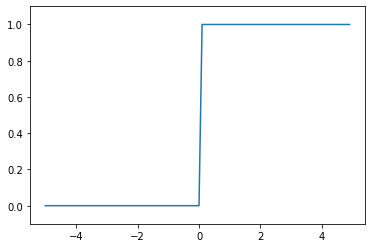

In [12]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype = np.int) # 배열 생성하면서 동시에 자료형까지 지정

x = np.arange(-5,5,0.1) # -5부터 5까지 0.1의 간격으로 수열 생성
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

- 시그모이드 함수 구현하기

In [13]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [14]:
x = np.array([-1,1,2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

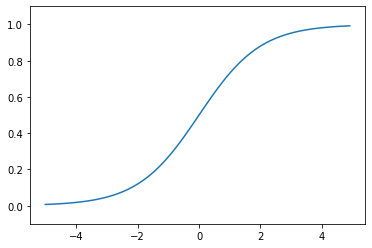

In [15]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

**S자모양**

- 시그모이드 함수와 계단 함수 비교

시그모이드는 부드러운 곡선이며 입력에 딸 출력이 연속적으로 변화한다.

한편 계단 함수는 0을 경계로 출력이 갑자기 바뀌어 버린다. 

이때 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다. 

계단 함수가 0과 1 중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려준다. 

다시말해, 퍼셉트론에서는 뉴런 사이에 0혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다.(신경망과 퍼셉트론은 유사하나 상이한 부분도 분명 있음. 다른 개념이다.)

비유하자면, 시그모이드 함수는 물레방아처럼 흘러온 물의 양에 비례해 흐르는 물의 양을 조절한다.

- 시그모이드 함수와 계단 함수의 공통점?
  - 큰 관점에서 보면 둘은 같은 모양을 하고 있다. 
  - 둘 다 입력이 작을 때의 출력은 0에 가깝거나 0이고, 입력이 커지면 출력이 1에 가까워지는 혹은 1이 되는 구조이다. 
  - 즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다.
    - 중요도?
  - 그리고 입력이 아무리 작거나 커도 출력은 0에서 1 사이라는 것도 둘의 공통점이다. 
  - 또한 두 함수 모두 ### 비선형 함수이다.

- 비선형 함수?
  - 직선 1개로는 그릴 수 없는 함수
  - 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다
    - 즉, 선형 함수는 사용해선 안 된다.
    - 왜? 선형 함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다. 
    - 선형 함수의 문제? 
      - 층을 아무리 깊게 해도 은닉층이 없는 네트워크(즉, 입력층과 출력층만 있는??)로도 똑같은 기능을 할 수 있다는 데 있다.
      - 이 부분 먼저 설명해보자
      - 선형 함수인 h(x) = cx를 활성화 함수로 사용한 3층 네트워크를 떠올려보라
      - 이를 식으로 나타내면 y(x) = h(h(h(x)))가 되면 계산은 c*c*c*x지만, 결국은 특정 상수 곱하기 엑스가 되는 것
      - 즉, y(x) = h(h(h(x))) = ax로도 표현가능하다는 것.
        - 은닉층이 없는 네트워크로도 표현이 가능해진 것이다. 

> 즉! 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없다. 

> 왜? 선형 함수로 여러 층을 구성해봤자 그냥 은닉층 없는 네트워크로도 동일 기능을 수행할 수 있기 때문에

#### 따라서 층을 쌓는 혜택을 얻기 위해선 활성화 함수를 비선형 함수로 채택해야 한다.

---

- ReLU 함수
  - 입력이 0을 넘으면 그 입력을 그대로 출력, 그렇지 않으면 무조건 0을 출력

In [16]:
def relu(x):
    return np.maximum(0,x)

- 넘파이 행렬을 써서 신경망을 구현해보자 
- 해당 예에서는 편향과 활성화 함수를 생략하고 가중치만 갖는 신경망을 구현한 것이다.

In [17]:
X = np.array([1,2]) # 입력값
W = np.array([[1,3,5],[2,4,6]]) # 가중치.
# 해당 예에서는 편향과 활성화 함수를 생략하고 가중치만 갖는 신경망을 구현한다고 했음
# 이때, 가중치는 2x3 크기의 matrix이다
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


> 주의 : Y = np.dot(X,W)에서 입력값과 각각 대응되는 가중치들이 적절히 곱해지도록 행렬곱이 이루어짐

> 이를테면 X가 1x2 크기의 행렬이고 W가 2x3 크기의 행렬인데 W에 원소들을 각각 어떻게 배치하느냐에 따라 입력값에 곱해져야 하는 가중치들이 적절히 곱해질 수도 안 곱해질 수도 있음 

> 따라서 행렬곱을 수행해줄 때 입력값 각각에 할당된 가중치들이 입력값과 적절히 곱해질 수 있도록 가중치 행렬을 구성해주어야 함

위 예에서 볼 수 있듯 행렬의 곱으로 한꺼번에 계산해주는 기능은 신경망을 구현할 때 매우 중요함을 알 수 있다. 

---

- 3층 신경망에서 수행되는 입력부터 출력까지의 처리(순방향 처리)를 구현해보자
- 넘파이 배열을 잘 구사하면 아주 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다. 

- 85p 그림 3-17을 확인해보면, 편향을 0층 뉴런에 따로 할당하여 처리해줄 수 있다.
- 해당 예에서는 편향을 1로 설정하여 두 입력값과 가중치가 곱해진 결과의 합과 편향을 더하여 다음 뉴런에 전달해주었음

In [18]:
X = np.array([1,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape) # 1x2 
print(W1.shape) # 2x3
print(B1.shape) # 1x3

A1 = np.dot(X,W1) + B1
print(A1) # 1x3
print(A1.shape)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
(3,)


- 0층이 아닌 1층에서의 활성화 함수를 시그모이드로 설정해보고 코드를 구현해보자

In [19]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


- 1층에서 2층으로 가는 과정을 구현해보자

In [20]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


- 해당 과정은 1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하면 0층에서 1층으로의 구현과 대동소이하다.
- 이처럼 넘파이 배열을 사용하면 층 사이의 신호 전달을 쉽게 구현할 수 있다. 

- 이제 2층에서 3층으로 즉, 2층에서 출력층으로의 신호 전달을 살펴보자
- 출력층의 구현도 그 동안의 구현과 일맥상통하나 활성화 함수만 지금까지의 은닉층과 다르다

In [21]:
def identity_function(x):
    return x

# 여기서는 활성화함수로서 항등함수를 설정한 것


W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3) # 혹은 Y = A3 , 활성화 함수로 항등함수를 설정했기 때문에

> 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 설정한다

> 이를테면, 회귀에는 항등함수를 설정하며 이진 분류에는 시그모이드 함수를 설정하고 다중분류에는 소프트맥스 함수를 사용하는 것이 일반적이다

> 해당 예에서는 회귀에서 항등함수를 설정하는 경우를 상정하고 출력층의 활성화함수를 설정해준 것이다. 

### 구현 정리

In [22]:
def init_network():
    network = {} # 빈 dict 설정
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

# 해당 함수를 실행시키면 3층짜리 신경망에서 필요한 가중치와 편향을 불러올 수 있음

# forward 함수를 실행시키기 위해서는 당연히 network가 설정되어 있어야 하고 network가 설정되기 위해서는 init_network함수가 불러와져야 함
def forward(network,x) : 
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1) # 입력층(0층)에서 1층으로 가며 얻은 출력값
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1,0.5]) # 0층에서의 입력값
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


> 이때 함수 이름을 forward라고 명해준 이유는 신호가 순방향(입력에서 출력 방향)으로 전달됨(순전파)을 알리기 위함

> 순전파가 있다는 것은 역전파도 있다는 의미

### 출력층 설계하기
- 신경망을 분류와 회귀 모두에 이용할 수 있다. 
- 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.
- 일반적으로 회귀에는 항등 함수를, 분류에는 소프트 맥스 함수를 사용한다.

> ### 항등 함수와 소프트 맥스 함수 구현하기

분류에서 사용하는 소프트 맥스의 식을 알아보자

$$y_k = \frac{exp(a_k)}{\Sigma exp(a_i)}$$

- 92p의 그림에서 볼 수 있듯, 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받는다. 소프트맥스 식의 분모에서 볼 수 있듯 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문이다.

---

> 0704~

- 소프트맥스 함수를 구현해보자

In [23]:
a = np.array([0.3,2.9,4])

exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)

y = exp_a/sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [24]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

- 소프트 맥스함수를 컴퓨터로 계산할 때는 결함이 있다.
### 바로 오버플로 문제이다

- 지수함수는 매우 큰 수까지 다루게 되는데 이런 큰 값끼리 나눗셈을 하게 되면 결과 수치가 불안정해진다
- 이 문제를 해결하도록 소프트 맥스 함수를 구현 개선해보자
- 자세한 식은 93p를 참고한다

> 오버플로 문제를 해결할 구체적인 예를 하나 살펴보자

In [25]:
a = np.array([1010,1000,990])
np.exp(a)/ np.sum(np.exp(a))


C:\Users\ehfus\AppData\Local\Temp/ipykernel_14060/4152157764.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a)/ np.sum(np.exp(a))
C:\Users\ehfus\AppData\Local\Temp/ipykernel_14060/4152157764.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a)/ np.sum(np.exp(a))


array([nan, nan, nan])

- 값이 너무 커 제대로 계산되지 않는다.

In [26]:
c = np.max(a)
a-c

array([  0, -10, -20])

> 이렇게 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다. 

In [27]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

> 이렇게 입력 신호 중 최댓값을 빼주면 올바르게 계산할 수 있다.

> 이를 바탕으로 소프트맥스 함수를 다시 구현해보자

In [28]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

- 소프트맥스 함수의 특징

In [29]:
a = np.array([0.3,2.9,4])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [30]:
np.sum(y)

1.0

> ### `특징 : 소프트 맥스 함수의 출력의 총합은 1이 된다`

- 따라서 확률로 이해할 수 있게 되는 것이다
  - 이를테면 결과 확률들로부터 "2번째 원소의 확률이 가장 높으니 답은 2번째 클래스다"라고 할 수 있는 것이다.
  - 즉, 소프트맥스 함수를 이용함으로써 문제를 확률적으로 대응할 수 있게 되는 것이다.

- 주의점
  - 지수 함수(단조 증가 함수)로 이루어진 특성 때문에 소프트맥스 함수를 적용해도 각 원소의 대소관계는 변하지 않는다.

---

- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다.
- 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다.
  - 위에서 기술했다.
- 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다.
- 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다. 

---

> 출력층의 뉴런 수 정하기

    출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정한다.
    분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.

> ### 손글씨 숫자 인식

(기계학습과 마찬가지로 신경망도 두 단계를 거쳐 문제를 해결한다. 먼저 훈련 데이터를 사용해 가중치 매개변수를 학습하고, 추론 단계에서는 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류한다. )

이번 절에서는 이미 학습된 매개변수를 사용하기 때문에, 가중치 매개변수를 학습하는 학습 과정은 생략하고, 추론과정만 구현한다. 

> ### MNIST data set

In [31]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train),(x_test,t_test) = load_mnist(flatten=True, normalize = False)
# 순서대로
# 훈련 이미지, 훈련 레이블, 시험 이미지, 시험 레이블

# 첫번째 인수인 normalize는 입력 이미지의 픽셀 값을 0~1 사이의 값으로 정규화할지를 정한다.
# 두번째 인수인 flatten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정한다. False로 정하면 입력 이미지를 1x28x28의 3차원 배열로
# 그렇지 않으면 784개의 원소로 이뤄진 1차원 배열로 저장한다. 


print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


----

- 파이썬에는 pickle이라는 기능이 있다.
  - 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능
  - 저장해둔 pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원할 수 있다

---

In [32]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train,t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label) # 5라는 label이 붙어있는 데이터임, x_train[0] = 5임

print(img.shape)
img = img.reshape(28,28) # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


---

> ### 신경망의 추론 처리

- 추론을 수행하는 신경망을 구현해보자
- 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다.
  - 각 데이터가 784개의 픽셀로 구성되어져 있기 때문에 입력층 뉴런은 784개가 필요하다.
  - 출력층 뉴런이 10개인 이유는 이 문제가 0에서 9가지의 숫자를 구분하는 문제이기 때문이다.
- 한편, 은닉층은 총 두 개로 첫 번째 은닉층에는 50개의 뉴런을, 두 번째 은닝층에는 100갸의 뉴런을 배치할 것이다. 
  - 여기서 50과 100은 임의로 정한 값이다. 

In [33]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl",'rb') as f :
        network = pickle.load(f)
        
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y

> 함수 init_network()에서는 pickle 파일인 sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽는다

해당 예제에서는 학습된 가중치 매개변수를 활용할 것이라고 전설하였음

해당 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.

> 이제 이 세 함수를 사용해 신경망에 의한 추론을 수행해보고, 정확도도 평가해보자

In [34]:
import pickle

In [35]:
x,t = get_data() # 이때 x에 할당된 data는 (x_train, t_train)으로서 훈련이미지와 훈련이미지 레이블이다.
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]: # 확률이 가장 높은 원소의 인덱스와 시험 데이터의 인덱스가 동일하면 accuracy_cnt를 하나 올려준다.
        accuracy_cnt += 1
    
print("Accuracy: "+ str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


- 이 예에서는 load_mnist 함수의 인수인 normalize를 True로 설정했다.
- normalize를 True로 설정하면 0\~255 범위인 각 픽셀의 값을 0\~1 범위로 변환한다.
- 단순히 픽셀의 값을 255로 나눈다.
- 이처럼 데이터를 특정 범위로 변환하는 처리를 정규화라 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리라 한다.
- 여기에서는 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행한 셈이다.

- 현업에서는 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동하거나 데이터의 확신 범위를 제한하는 정규화를 수행한다.
- 혹은 전체 데이터를 균일하게 분포시키는 데이터 백색화등도 있따. 

---

> ### 배치 처리

배치?
- 하나로 묶은 입력 데이터
- 곧 묶음을 의미함
- 이미지가 지폐처럼 다발로 묶여있는 형태

배치 처리를 수행함으로써 큰 배열로 이뤄진 계산을 하게 되는데 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다. 

배치 처리를 구현해보자

In [40]:
x,t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size] # 입력데이터를 지폐처럼 묶음으로 묶는 과정
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 최댓값의 index
    # 이때, axis=1의 역할 : 100x10의 배열 중 1번째 차원을 구성하는 각 원소에서 최댓값의 인덱스를 찾도록 한 것
    # index는 0부터 시작하므로 실질적으로는 2번째 차원을 의미함
    # 아래에서 예를 살펴보자
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [50]:
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3],[0.8,0.1,0.1]])
y = np.argmax(x, axis=1)
y1 = np.argmax(x,axis=0) 
y2 = np.argmax(x)
print(y) # 행차원
print(y1) # 열차원
print(y2) # 별 효용성은 없어보이지만 아래 예시를 통해 알아보자

[1 2 1 0]
[3 0 1]
1


In [52]:
x = np.array([[1,2,3],[2,10,4],[5,6,7]])
np.argmax(x)

4

axis를 설정해주지 않으면 그냥 1차원적인 배열로 생각하고 index 찾는 것 같음

> data를 배치로 처리함으로써 효율적이고 빠르게 처리할 수 있었음

> Conclusion

    지금까지 신경망의 순전파를 살펴보았다.
    이번 장에서 설명한 `신경망`은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 앞 장의 퍼셉트론과 같다.
    하지만 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있었다. 
    신경망에서는 매끄럽게 변화하는 시그모이드 함수를 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수로 사용했다. 
    이 차이가 신경망 학습에 중요하다.
    다음 장에서 부연 설명한다.

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트 맥스 함수를 이용한다. 
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다. 
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다. 

---

---

---

> ### 신경망 학습

신경망 학습
- 여기서 학습이란? 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 의미.
- 신경망이 학습할 수 있도록 해주는 지표인 손실 함수에 대해 알아보자
- 이 `손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것`이 학습 목표이다. 

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

한 가지 예를 들어보자

여러 사람이 자필로 작성한 5라는 숫자를 인식하고자 할 때, 5를 인식하는 알고리즘을 밑바닥부터 설계하는 대신, 주어진 데이터를 잘 활용해 해결할 수 있다. 이미지에서 feature를 추출하고 그 feature의 패턴을 기계학습 기술로 학습하는 방법이다. 여기서 말하는 feature는 입력 데이터(입력 이미지)에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변화기를 가리킨다.

이미지의 특징은 보통 vector로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용한다. 이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN등으로 학습할 수 있다. 

- 위에서 언급한 기계학습은 딥러닝을 제외한 머신러닝을 의미.

- 기계학습에서 단순 이미지를 벡터로 변환할 때 사용하는 특징은 사람이 설계해야 한다.
  - 하지만 신경망은 이미지에 포함된 중요한 특징까지도 기계가 스스로 학습한다. 

- 따라서 신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점이다.
- 예를 들어, 5를 인식하는 문제든, 개를 인식하는 문제든 아니면 사람의 얼굴을 인식하는 문제든 세부사항과 관계없이 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도한다.
- 즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습한다. 

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

모델의 범용능력을 제대로 평가하기 위해 기계학습에서는 훈련 데이터와 시험 데이터를 구분하여 사용한다.
  - 참고로 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅이라고 한다. 
  - 오버피팅의 해결은 기계학습의 중요한 과제이기도 하다.

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->

> ### 손실 함수

신경망 학습에서 사용하는 지표로서 이 손실 함수는 임의의 함수를 사용할 수도 있지만, 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.